#Thinkful Data Science Course
##Unit 4: Predicting the Future; Lesson 2: Decision Trees
##Random Forest Analysis

###Data Cleaning and Exploration

Download and unzip UCI HAR Dataset.zip from the UCI Machine Learning Repository (click "Data Folder" next to "Download").
Read through features_info.txt. This file describes each feature, its physical significance, and also describes features that are derived from raw data by doing some averaging, or sampling, or some operation that gives a numerical result. What do you notice about the dataset? What kind of guidelines for approaching the dataset do you find?
In static activities (sit, stand, lie down) motion information will not be very useful.
In the dynamic activities (3 types of walking) motion will be significant.
Angle variables will be useful both in differentiating “lie vs stand” and “walk up vs walk down”.
Acceleration and Jerk variables are important in distinguishing various kinds of motion while filtering out random tremors while static.
Mag and Angle variables contain the same info as (e.g., are strongly correlated with) XYZ variables. We choose to focus on the latter as they are simpler to reason about. This is a very important point to understand as it results in elimination of a few hundred variables.
We ignore the band variables as we have no simple way to interpret the meaning and relate them to physical activities.
mean and std are important, skewness and kurtosis may also so we include all of these.

####Note: 
for each of the tasks below, think about how you will fix the data and what the implications/ramifications of your fixes will be. Also, can you think of a way to accomplish several of the cleaning tasks at once?

Identify and fix the inclusion of ( ) in column names.
Identify and fix the inclusion of ‘-’ in column names.
Replace ',' with '_' in column names.
Drop 'Body' and 'Mag' from column names.
Map 'mean' and 'std' to 'Mean' and 'STD'
Make 'activity' a categorical variable.
Plot a histogram of Body Acceleration Magnitude to see how each variable does as a predictor of static versus dynamic activities.


In [33]:
import pandas as pd
import randomforests as rf
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as skm
import sklearn.ensemble as sk
import pylab as pl

In [34]:
samtrain = pd.read_csv('/Users/molliepettit/Desktop/Data Science/Thinkful/Projects/Unit4/samsung/samtrain.csv')
samval = pd.read_csv('/Users/molliepettit/Desktop/Data Science/Thinkful/Projects/Unit4/samsung/samval.csv')
samtest = pd.read_csv('/Users/molliepettit/Desktop/Data Science/Thinkful/Projects/Unit4/samsung/samtest.csv')

Preview some of the data:

In [35]:
samtrain

,Unnamed: 0,tAccMean,tAccStd,tJerkMean,tJerkSD,tGyroMean,tGyroSD,tGyroJerkMean,tGyroJerkMagSD,fAccMean,...,fGyroJerkKurtosis,angleAccGravity,angleJerkGravity,angleGyroGravity,angleGyroJerkGravity,angleXGravity,angleYGravity,angleZGravity,subject,activity
0,1,-0.959434,-0.950551,-0.993306,-0.994336,-0.968959,-0.964335,-0.994248,-0.991368,-0.952155,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,standing
1,2,-0.979289,-0.976057,-0.991253,-0.991694,-0.980683,-0.983754,-0.995123,-0.996102,-0.980857,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,standing
2,3,-0.983703,-0.988020,-0.988531,-0.990397,-0.976317,-0.986051,-0.993403,-0.995091,-0.987795,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,standing
3,4,-0.986542,-0.986421,-0.993078,-0.993381,-0.982060,-0.987351,-0.995502,-0.995267,-0.987519,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,standing
4,5,-0.992827,-0.991275,-0.993480,-0.995854,-0.985204,-0.989063,-0.995808,-0.995258,-0.993591,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,standing
5,6,-0.994295,-0.995249,-0.993018,-0.995424,-0.985894,-0.986440,-0.995275,-0.995205,-0.994836,...,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,standing
6,7,-0.987466,-0.982746,-0.991314,-0.989448,-0.985501,-0.984625,-0.993719,-0.995269,-0.982135,...,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,1,standing
7,8,-0.977458,-0.975997,-0.990851,-0.990388,-0.984506,-0.986838,-0.994291,-0.995211,-0.982184,...,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,1,standing
8,9,-0.983631,-0.977514,-0.993325,-0.992887,-0.989370,-0.990914,-0.995850,-0.995588,-0.983131,...,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,1,standing
9,10,-0.986772,-0.986702,-0.985388,-0.983643,-0.984524,-0.980264,-0.989799,-0.990735,-0.984994,...,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,1,standing


In [36]:
samval

,Unnamed: 0,tAccMean,tAccStd,tJerkMean,tJerkSD,tGyroMean,tGyroSD,tGyroJerkMean,tGyroJerkMagSD,fAccMean,...,fGyroJerkKurtosis,angleAccGravity,angleJerkGravity,angleGyroGravity,angleGyroJerkGravity,angleXGravity,angleYGravity,angleZGravity,subject,activity
0,3966,-0.782808,-0.746267,-0.836010,-0.670788,-0.706171,-0.690900,-0.805970,-0.778162,-0.705378,...,-0.440427,-0.015173,-0.289105,-0.588349,0.051690,-0.658107,0.306648,0.130139,21,standing
1,3967,-0.886897,-0.850645,-0.962290,-0.937674,-0.865987,-0.757075,-0.938773,-0.880460,-0.887307,...,0.384014,-0.457228,0.284724,-0.525611,0.834287,-0.631113,0.310777,0.159743,21,standing
2,3968,-0.900747,-0.872747,-0.964719,-0.941369,-0.877378,-0.836477,-0.964791,-0.956132,-0.907046,...,-0.086438,0.166681,0.057764,0.628871,-0.734367,-0.632521,0.305594,0.165904,21,standing
3,3969,-0.883321,-0.858033,-0.930145,-0.913145,-0.839208,-0.821157,-0.945937,-0.957287,-0.886470,...,-0.530977,0.075160,0.184325,-0.017363,-0.937170,-0.641088,0.304133,0.157569,21,standing
4,3970,-0.937834,-0.894600,-0.952980,-0.915333,-0.915617,-0.837527,-0.967671,-0.959835,-0.895751,...,0.020834,-0.099957,-0.017790,-0.241290,0.819461,-0.643430,0.306376,0.150995,21,standing
5,3971,-0.967582,-0.958965,-0.978520,-0.962604,-0.956284,-0.950400,-0.982568,-0.977330,-0.968196,...,-0.629090,-0.007712,0.064342,0.467554,0.442353,-0.646012,0.307363,0.145917,21,standing
6,3972,-0.975128,-0.953184,-0.978236,-0.963259,-0.969381,-0.943871,-0.984932,-0.976879,-0.965543,...,-0.364225,-0.013597,-0.570739,0.470380,-0.420999,-0.650765,0.302348,0.148019,21,standing
7,3973,-0.991612,-0.992505,-0.989447,-0.990300,-0.987040,-0.990144,-0.994072,-0.995465,-0.990847,...,-0.838405,-0.131150,-0.627706,-0.897099,-0.783737,-0.652798,0.299634,0.149794,21,standing
8,3974,-0.992257,-0.993841,-0.992208,-0.990973,-0.988556,-0.988641,-0.996521,-0.997919,-0.992129,...,-0.867300,-0.030527,0.247046,-0.691627,-0.248657,-0.654532,0.298122,0.149988,21,standing
9,3975,-0.994733,-0.995311,-0.993299,-0.996857,-0.992795,-0.990051,-0.997342,-0.998594,-0.994516,...,-0.924335,-0.056554,0.237799,-0.663555,0.863976,-0.653458,0.298277,0.151115,21,standing


We use the Python RandomForest package from the scikits.learn collection of algorithms. 

For this we need to convert the target column ('activity') to integer values because the Python RandomForest package requires that.  

We map activity to an integer according to laying = 1, sitting = 2, standing = 3, walk = 4, walkup = 5, walkdown = 6 

Code also uses library randomforest.py (uploaded in git)

In [37]:
samtrain = rf.remap_col(samtrain,'activity')
samval = rf.remap_col(samval,'activity')
samtest = rf.remap_col(samtest,'activity')

All Column Names:

In [38]:
list(samtrain.columns.values)

['Unnamed: 0',
 'tAccMean',
 'tAccStd',
 'tJerkMean',
 'tJerkSD',
 'tGyroMean',
 'tGyroSD',
 'tGyroJerkMean',
 'tGyroJerkMagSD',
 'fAccMean',
 'fAccSD',
 'fAccMeanFreq',
 'fJerkMean',
 'fJerkSD',
 'fJerkMeanFreq',
 'fGyroMean',
 'fGyroSD',
 'fGyroMeanFreq',
 'fGyroJerkMean',
 'fGyroJerkSD',
 'fGyroJerkMeanFreq',
 'fAccSkewness',
 'fJerkSkewness',
 'fGyroSkewness',
 'fGyroJerkSkewness',
 'fAccKurtosis',
 'fJerkKurtosis',
 'fGyroKurtosis',
 'fGyroJerkKurtosis',
 'angleAccGravity',
 'angleJerkGravity',
 'angleGyroGravity',
 'angleGyroJerkGravity',
 'angleXGravity',
 'angleYGravity',
 'angleZGravity',
 'subject',
 'activity']

We're going to train a random forest classifier on the subset of features we pulled out based on what we learned during data cleaning and exploration. Please use scikit-learn's implenetation, as it provides easy access to feature importances after fitting your model.

1) Split the data into training, test, and validation sets.

2) Fit a random forest classifier with 500 estimators to your training set.

3) Rank the features by their importance scores. What are the top 10 important features? What is the 10th feature's importance score?

4) What is your model's mean accuracy score on the validation and test sets?

5) What is your model's precision and recall score on the test set?

###1) Split the data into training, test, and validation sets.
(below)
###2) Fit a random forest classifier with 500 estimators to your training set.
n_estimators describes the "number of trees in the forest, so setting it to 500 sets 500 estimators to the training set

In [39]:
rfc = sk.RandomForestClassifier(n_estimators=500, oob_score=True)

train_data = samtrain[samtrain.columns[1:-2]]
train_truth = samtrain['activity']
model = rfc.fit(train_data, train_truth)

Use the OOB (out of band) score which is an estimate of accuracy of our model.
####Note:
Oob_score is a boolean that describes whether to use out-of-bag samples to estimate the generalization error. In this case, we selected "True", so out-of-bag samples will be used in estimation.
####Out-of-bag Data: 
When the training set for the current tree is drawn by sampling with replacement, about one-third of the cases are left out of the sample. This oob (out-of-bag) data is used to get a running unbiased estimate of the classification error as trees are added to the forest. It is also used to get estimates of variable importance.


In [40]:
rfc.oob_score_

0.97946768060836498

like aggregated mse for trees

###3) Rank the features by their importance scores. What are the top 10 important features? What is the 10th feature's importance score?

In [41]:
fi = enumerate(rfc.feature_importances_)
cols = samtrain.columns
[(value,cols[i]) for (i,value) in fi if value > 0.039]

[(0.050462018285526392, 'tAccMean'),
 (0.04284278473839772, 'tAccStd'),
 (0.040681501186777803, 'tJerkMean'),
 (0.050540590147400123, 'tGyroJerkMagSD'),
 (0.058199780325124011, 'fAccMean'),
 (0.047264195868468716, 'fJerkSD'),
 (0.14123508051048597, 'angleGyroJerkGravity'),
 (0.17376854931864918, 'angleXGravity'),
 (0.0445832344663422, 'angleYGravity')]

Change the value 0.04 which we picked empirically to give us 10 variables try running this code after changing the value up and down so you get more or less variables do you see how this might be useful in refining the model? 

Here is the code in case you mess up the line above:
[(value,cols[i]) for (i,value) in fi if value > 0.04]

###What is the 10th feature's importance score?
0.039802813014079924, 'Unnamed: 0'

###4) What is your model's mean accuracy score on the validation and test sets?

In [42]:
samval.columns[1:-2]

Index(['tAccMean', 'tAccStd', 'tJerkMean', 'tJerkSD', 'tGyroMean', 'tGyroSD',
       'tGyroJerkMean', 'tGyroJerkMagSD', 'fAccMean', 'fAccSD', 'fAccMeanFreq',
       'fJerkMean', 'fJerkSD', 'fJerkMeanFreq', 'fGyroMean', 'fGyroSD',
       'fGyroMeanFreq', 'fGyroJerkMean', 'fGyroJerkSD', 'fGyroJerkMeanFreq',
       'fAccSkewness', 'fJerkSkewness', 'fGyroSkewness', 'fGyroJerkSkewness',
       'fAccKurtosis', 'fJerkKurtosis', 'fGyroKurtosis', 'fGyroJerkKurtosis',
       'angleAccGravity', 'angleJerkGravity', 'angleGyroGravity',
       'angleGyroJerkGravity', 'angleXGravity', 'angleYGravity',
       'angleZGravity'],
      dtype='object')

In [43]:
samval[samval.columns[1:-2]]

,tAccMean,tAccStd,tJerkMean,tJerkSD,tGyroMean,tGyroSD,tGyroJerkMean,tGyroJerkMagSD,fAccMean,fAccSD,...,fJerkKurtosis,fGyroKurtosis,fGyroJerkKurtosis,angleAccGravity,angleJerkGravity,angleGyroGravity,angleGyroJerkGravity,angleXGravity,angleYGravity,angleZGravity
0,-0.782808,-0.746267,-0.836010,-0.670788,-0.706171,-0.690900,-0.805970,-0.778162,-0.705378,-0.811476,...,0.154308,-0.062154,-0.440427,-0.015173,-0.289105,-0.588349,0.051690,-0.658107,0.306648,0.130139
1,-0.886897,-0.850645,-0.962290,-0.937674,-0.865987,-0.757075,-0.938773,-0.880460,-0.887307,-0.855137,...,0.109330,0.586449,0.384014,-0.457228,0.284724,-0.525611,0.834287,-0.631113,0.310777,0.159743
2,-0.900747,-0.872747,-0.964719,-0.941369,-0.877378,-0.836477,-0.964791,-0.956132,-0.907046,-0.875083,...,-0.177412,0.206272,-0.086438,0.166681,0.057764,0.628871,-0.734367,-0.632521,0.305594,0.165904
3,-0.883321,-0.858033,-0.930145,-0.913145,-0.839208,-0.821157,-0.945937,-0.957287,-0.886470,-0.864851,...,-0.091558,-0.147670,-0.530977,0.075160,0.184325,-0.017363,-0.937170,-0.641088,0.304133,0.157569
4,-0.937834,-0.894600,-0.952980,-0.915333,-0.915617,-0.837527,-0.967671,-0.959835,-0.895751,-0.909203,...,-0.259811,0.297192,0.020834,-0.099957,-0.017790,-0.241290,0.819461,-0.643430,0.306376,0.150995
5,-0.967582,-0.958965,-0.978520,-0.962604,-0.956284,-0.950400,-0.982568,-0.977330,-0.968196,-0.959249,...,-0.388913,-0.184768,-0.629090,-0.007712,0.064342,0.467554,0.442353,-0.646012,0.307363,0.145917
6,-0.975128,-0.953184,-0.978236,-0.963259,-0.969381,-0.943871,-0.984932,-0.976879,-0.965543,-0.952938,...,-0.498047,0.071416,-0.364225,-0.013597,-0.570739,0.470380,-0.420999,-0.650765,0.302348,0.148019
7,-0.991612,-0.992505,-0.989447,-0.990300,-0.987040,-0.990144,-0.994072,-0.995465,-0.990847,-0.994106,...,0.353780,-0.574366,-0.838405,-0.131150,-0.627706,-0.897099,-0.783737,-0.652798,0.299634,0.149794
8,-0.992257,-0.993841,-0.992208,-0.990973,-0.988556,-0.988641,-0.996521,-0.997919,-0.992129,-0.995362,...,0.394614,-0.573617,-0.867300,-0.030527,0.247046,-0.691627,-0.248657,-0.654532,0.298122,0.149988
9,-0.994733,-0.995311,-0.993299,-0.996857,-0.992795,-0.990051,-0.997342,-0.998594,-0.994516,-0.995827,...,0.492250,-0.712018,-0.924335,-0.056554,0.237799,-0.663555,0.863976,-0.653458,0.298277,0.151115


In [44]:
samval['activity']

0       3
1       3
2       3
3       3
4       3
5       3
6       3
7       3
8       3
9       3
10      3
11      3
12      3
13      3
14      3
15      3
16      3
17      3
18      3
19      3
20      3
21      3
22      3
23      3
24      3
25      3
26      3
27      3
28      3
29      3
       ..
1872    5
1873    5
1874    5
1875    5
1876    5
1877    5
1878    5
1879    5
1880    5
1881    5
1882    5
1883    5
1884    5
1885    6
1886    6
1887    6
1888    6
1889    6
1890    6
1891    6
1892    6
1893    5
1894    5
1895    5
1896    5
1897    5
1898    5
1899    5
1900    5
1901    5
Name: activity, dtype: int64

In [45]:
rfc.predict(val_data)

array([3, 3, 3, ..., 6, 6, 6])

In [46]:
val_data = samval[samval.columns[1:-2]]
val_truth = samval['activity']
val_pred = rfc.predict(val_data)

test_data = samtest[samtest.columns[1:-2]]
test_truth = samtest['activity']
test_pred = rfc.predict(test_data)

We use the predict() function using our model on our validation set and our test set and get the following results from our analysis of errors in the predictions.

Pandas data frame adds a spurious unknown column in 0 position hence starting at col 1 not using subject column, activity ie target is in last columns hence -2 i.e dropping last 2 cols

###Prediction Errors and Computed Error Measures

In [47]:
print("mean accuracy score for validation set = %f" %(rfc.score(val_data, val_truth)))
print("mean accuracy score for test set = %f" %(rfc.score(test_data, test_truth)))

mean accuracy score for validation set = 0.833859
mean accuracy score for test set = 0.897643


###5) What is your model's precision and recall score on the test set?

####Confusion Matrix
Use the confusion matrix to see how observations were misclassified as other activities. See [5]

In [48]:
test_cm = skm.confusion_matrix(test_truth,test_pred)

visualize the confusion matrix

In [49]:
pl.matshow(test_cm)
pl.title('Confusion matrix for test data\n'
         + '                               ')
pl.xlabel('Predicted')
pl.ylabel('True')
pl.colorbar()
pl.savefig('RandomForest_ConfusionMatrix.png')

####Compute a number of other common measures of prediction goodness

We now compute some commonly used measures of prediction "goodness".
For more detail on these measures see [6],[7],[8],[9]

####Accuracy

In [68]:
print("Accuracy = %f" %(skm.accuracy_score(test_truth,test_pred)))

Accuracy = 0.897643


####Precision

In [15]:
print("Precision = %f" %(skm.precision_score(test_truth,test_pred)))

Precision = 0.889686


/Users/molliepettit/anaconda/lib/python3.4/site-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


####Recall

In [16]:
print("Recall = %f" %(skm.recall_score(test_truth,test_pred)))

Recall = 0.886195


/Users/molliepettit/anaconda/lib/python3.4/site-packages/sklearn/metrics/classification.py:1172: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


####F1 Score

In [17]:
print("F1 score = %f" %(skm.f1_score(test_truth,test_pred)))

F1 score = 0.886695


/Users/molliepettit/anaconda/lib/python3.4/site-packages/sklearn/metrics/classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


 ####ROC Curve

In [70]:
from sklearn import metrics

In [71]:
metrics.auc(fpr, tpr)

0.27293202293202296

In [73]:
fpr, tpr, thresholds = metrics.roc_curve(test_truth, test_pred, pos_label=2)

In [74]:
fpr

array([ 0.        ,  0.17117117,  0.34152334,  0.51678952,  0.73464373,
        0.76003276,  1.        ])

In [75]:
tpr

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.16666667,
        1.        ,  1.        ])

In [76]:
thresholds

array([7, 6, 5, 4, 3, 2, 1])

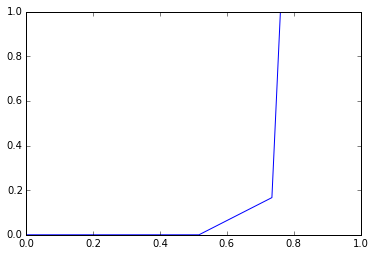

In [77]:
%matplotlib inline
pl.plot(fpr,tpr)
pl.show()

###Conclusions¶
We can make the following concrete conclusions looking at the above results.
Random Forests give us satisfactory error rates and predictive power in this scenario.
￼Using domain knowledge it is possible to get surprisingly high values of predictive measures, and low error rates on validation and test sets.
This is supported by the results, i.e. ~90% on predictive measures, OOB error estimates ~2%.
We only did this once and did not go back and forth tweaking the models. Note that we stuck to the rules here and did not see the test set until we were done modeling.
Focusing on magnitude and angle information for acceleration and jerk in the time and frequency domains gives us a model with surprising predictive power. It's possible that a brute force model will give better predictive power but it would simply show us how to blindly apply software. If for some reason the model misbehaved or failed, we would not have any insight at all as to why. Instead we used domain knowledge to focus on insight and in the process created a model with interpretive value.
Model performance on the test set is better than on the validation set as seen in the two “Total” rows above and each individual activity.
Let's see how we might be able to improve the model in future. It's always good to note the possible ways in which our model(s) might be deficient or incomplete or unfinished so we don't get overconfident about our models and overpromise what they can do.

###Critique
Our model eliminated a number of Magnitude related attributes such as -mad, -max, -min also a number of Gyro related variables during the variable selection process using domain knowledge. These may be important but this was not tested. We may want to look at that the next time we do this.
Variable importance should be investigated in detail - i.e. we really ought to look at how we can use the smaller number of attributes identified as important, to create the model and see what the difference is. Computationally this would be more efficient. We could even use simpler methods like Logistic Regression to do the classification from that point on, using only the reduced set of variables.

###Exercise
Instead of using domain knowledge to reduce variables, use Random Forests directly on the full set of columns. Then use variable importance and sort the variables.
Compare the model you get with the model you got from using domain knowledge.
You can short circuit the data cleanup process as well by simply renaming the variables x1, x2...xn, y where y is 'activity' the dependent variable.
Now look at the new Random Forest model you get. It is likely to be more accurate at prediction than the one we have above. It is a black box model, where there is no meaning attached to the variables.
What insights does it give you?
Which model do you prefer?
Why?
Is this an absolute preference or might it change?
What might cause it to change?